In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from numpy.linalg import inv

# Task 1

## Read three card images and the four points 
- Use ImageJ to get position for P,S,Q,R and confirm with scatter dots 
- Store the position of four points in four_point_card1, four_point_card2 and four_point_card3

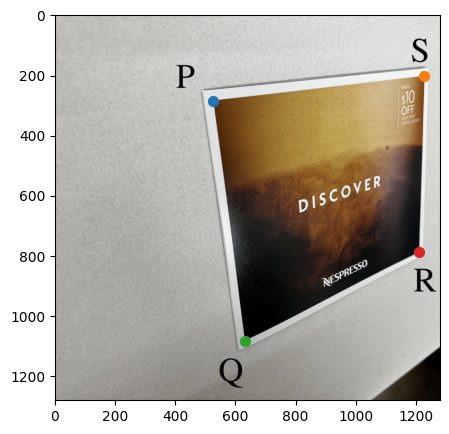

In [2]:
# Card1
img_card1 = mpimg.imread('card1.jpeg')

plt.figure(figsize=(5, 5))
plt.imshow(img_card1)

# read the position info with ImageJ
P1 = [526,283,1]
S1 = [1228,202,1]
Q1 = [631,1081,1]
R1 = [1209,786,1]

# realize the position index read from ImageJ x,y are exchanged 
P1[1],P1[0] = P1[0],P1[1]
Q1[1],Q1[0] = Q1[0],Q1[1]
R1[1],R1[0] = R1[0],R1[1]
S1[1],S1[0] = S1[0],S1[1]

four_point_card1 = np.array([P1,S1,Q1,R1])

for i in four_point_card1:
    plt.scatter(i[1],i[0],marker='o',s=50)

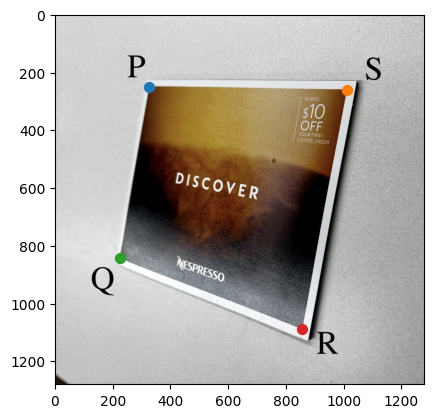

In [3]:
# Card2
img_card2 = mpimg.imread('card2.jpeg')

plt.imshow(img_card2)

# read the position with ImageJ
P2 = [325,250,1]
S2 = [1010,260,1]
Q2 = [224,842,1]
R2 = [854,1089,1]

P2[1],P2[0] = P2[0],P2[1]
Q2[1],Q2[0] = Q2[0],Q2[1]
R2[1],R2[0] = R2[0],R2[1]
S2[1],S2[0] = S2[0],S2[1]

four_point_card2 = np.array([P2,S2,Q2,R2])

for i in four_point_card2:
    plt.scatter(i[1],i[0],marker='o',s=50)

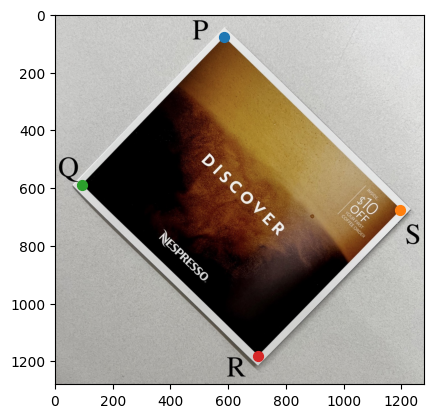

In [4]:
# Card3
img_card3 = mpimg.imread('card3.jpeg')

plt.imshow(img_card3)

# read the position with ImageJ
P3 = [585,78,1]
S3 = [1195,675,1]
Q3 = [93,588,1]
R3 = [703,1181,1]

P3[1],P3[0] = P3[0],P3[1]
Q3[1],Q3[0] = Q3[0],Q3[1]
R3[1],R3[0] = R3[0],R3[1]
S3[1],S3[0] = S3[0],S3[1]

four_point_card3 = np.array([P3,S3,Q3,R3])

for i in four_point_card3:
    plt.scatter(i[1],i[0],marker='o',s=50)

## Read the car image and choose P,S,Q,R

Text(730, 530, 'R')

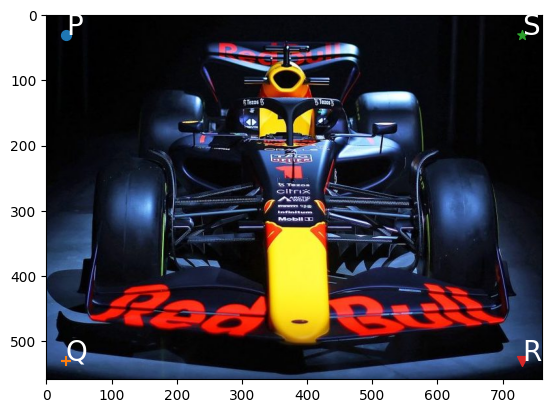

In [5]:
img_car = mpimg.imread('car.jpg')
    
plt.imshow(img_car)


# selected point close to the boundary
P_car = [30,30,1]
Q_car = [530,30,1]
S_car = [30,730,1]
R_car = [530,730,1]

four_point_car = np.array([P_car,S_car,Q_car,R_car])

plt.scatter(P_car[1],P_car[0],marker='o',s=50)
plt.text(P_car[1],P_car[0],'P', color = 'white', fontsize=20)
plt.scatter(Q_car[1],Q_car[0],marker='+',s=50)
plt.text(Q_car[1],Q_car[0],'Q',color = 'white', fontsize=20)
plt.scatter(S_car[1],S_car[0],marker='*',s=50)
plt.text(S_car[1],S_car[0],'S',color = 'white', fontsize=20)
plt.scatter(R_car[1],R_car[0],marker='v',s=50)
plt.text(R_car[1],R_car[0],'R',color = 'white', fontsize=20)

## Calculate homography

The equation with four points can be given by: 
$M_{eq} H^T_v = V^T_{eq}$, where 

  $H_v$  = [h11, h12, h13, h21, h22, h23, h31, h32]; 
  
  
  $M_{eq}$ =   
              [$P_x$, $P_y$, 1, 0, 0, 0, -$P_x$* $P^\prime_x$, -$P_y$* $P^\prime_x$  
               $S_x$, $S_y$, 1, 0, 0, 0, -$S_x$* $S^\prime_x$, -$S_y$* $S^\prime_x$  
               $Q_x$, $Q_y$, 1, 0, 0, 0, -$Q_x$* $Q^\prime_x$, -$Q_y$* $Q^\prime_x$  
               $R_x$, $R_y$, 1, 0, 0, 0, -$R_x$* $R^\prime_x$, -$R_y$* $R^\prime_x$  
               0, 0, 0,$P_x$, $P_y$, 1, -$P_x$* $P^\prime_y$, -$P_y$* $P^\prime_y$  
               0, 0, 0,$S_x$, $S_y$, 1, -$S_x$* $S^\prime_y$, -$S_y$* $S^\prime_y$  
               0, 0, 0,$Q_x$, $Q_y$, 1, -$Q_x$* $Q^\prime_y$, -$Q_y$* $Q^\prime_y$  
               0, 0, 0,$R_x$, $R_y$, 1, -$R_x$* $R^\prime_y$, -$R_y$* $R^\prime_y$]  
               
               
               
 $V_{eq}$ = [$P^\prime_x$, $S^\prime_x$, $Q^\prime_x$, $R^\prime_x$, $P^\prime_y$, $S^\prime_y$, $Q^\prime_y$, $R^\prime_y$]
 
 
We can get $H^T_v = inv(M_{eq})V^T_{eq}$ 

Below is a function to calculate Homography matrix given ($P,S,Q,R$) and ($P^\prime$,$S^\prime$,$Q^\prime$,$R^\prime$)

In [6]:
#  Homography from base to aim, given four point in base and aim
def H_homo(base_four_point, aim_four_point): 
    V_eq = np.zeros(8)
    M_eq = np.zeros((8,8))

    for i in range(4):
    
        M_eq[i,0:3] = base_four_point[i,:];
        M_eq[i,6:8] = -aim_four_point[i,0]*base_four_point[i,0:2]
        V_eq[i] = aim_four_point[i,0]
    
        M_eq[i+4,3:6] = base_four_point[i,:];
        M_eq[i+4,6:8] = -aim_four_point[i,1]*base_four_point[i,0:2]
        V_eq[i+4] = aim_four_point[i,1]

    M_h_para = np.matmul(inv(M_eq),V_eq)
    M_h_para = np.append(M_h_para,[1])
    M_h = M_h_para.reshape([3,3])

    print('Homography: \n',M_h) 
    return M_h

In [7]:
print('(1) Projection from car to card1: \n')
H_homo(four_point_car,four_point_card1);

(1) Projection from car to card1: 

Homography: 
 [[2.16900077e+00 2.44591956e-02 2.27313652e+02]
 [5.18673055e-01 1.91600262e+00 4.71764604e+02]
 [4.77282735e-04 7.14407671e-04 1.00000000e+00]]


In [8]:
print('(2) Projection from car to card2: \n')
H_homo(four_point_car,four_point_card2);

(2) Projection from car to card2: 

Homography: 
 [[ 1.19610711e+00 -9.25358039e-02  2.14044181e+02]
 [-1.92888225e-01  5.53092714e-01  3.10490582e+02]
 [ 3.04019720e-05 -4.10225910e-04  1.00000000e+00]]


In [9]:
print('(3) Projection from car to card3: \n')
H_homo(four_point_car,four_point_card3);

(3) Projection from car to card3: 

Homography: 
 [[ 1.02423442e+00  8.57093689e-01  2.15890920e+01]
 [-9.83755147e-01  8.78691986e-01  5.88368910e+02]
 [ 6.55788674e-06  5.80765231e-06  1.00000000e+00]]


## 1.2 Homography card1 -> card 3

In [10]:
print('(1) Projection from card1 to card2 H_12: \n')
H_12 = H_homo(four_point_card1,four_point_card2);

(1) Projection from card1 to card2 H_12: 

Homography: 
 [[ 3.99710850e-01 -7.88288675e-02  1.02950749e+02]
 [-1.41234755e-01  1.41181922e-01  1.92694161e+02]
 [-8.34191498e-05 -5.28465092e-04  1.00000000e+00]]


In [11]:
print('(2) Projection from card1 to card2 H_23: \n')
H_23 = H_homo(four_point_card2,four_point_card3);

(2) Projection from card1 to card2 H_23: 

Homography: 
 [[ 1.36131326e+00  1.61627023e+00 -7.65958808e+02]
 [-7.10494307e-01  2.07337593e+00  2.51206408e+02]
 [ 1.06114378e-04  7.72706277e-04  1.00000000e+00]]


In [12]:
print('(3) Calculate H_13 = H_23 H_12 \n')
H_13 = np.matmul(H_23, H_12)
print('H_13 = \n', H_13)

(3) Calculate H_13 = H_23 H_12 

H_13 = 
 [[ 3.79753784e-01  5.25659847e-01 -3.14364751e+02]
 [-5.97780450e-01  2.15976844e-01  5.77587922e+02]
 [-1.50137063e-04 -4.27737811e-04  1.15982054e+00]]


## Apply H_13 to image card1

In [13]:
# a function to project a point from image B(Base)->A(Aim), given the Homography H_mat
# the given point is in B(Base)
def transform(H_mat,base,aim,base_point):
    aim_point = np.matmul(H_mat, np.append(base_point,np.array([1])))
    aim_point = aim_point/aim_point[-1];
    if (aim_point[0]<aim.shape[0]) & (aim_point[0]>=0) & (aim_point[1]<aim.shape[1]) & (aim_point[1]>=0):
        aim[int(aim_point[0]),int(aim_point[1])] = base[base_point[0],base_point[1]]

# a function to project a point from image B(Base)->A(Aim), given the Homography H_mat
# the given point is in A(Aim)
def transform_inv(H_mat,base,aim,aim_point):
    base_point = np.matmul(inv(H_mat), np.append(aim_point,np.array([1])))
    base_point = base_point/base_point[-1]
    if (base_point[0]<base.shape[0]) & (base_point[0]>=0) & (base_point[1]<base.shape[1]) & (base_point[1]>=0):
        aim[aim_point[0],aim_point[1]] = base[int(base_point[0]),int(base_point[1])]  
    else:
        aim[aim_point[0],aim_point[1]] = np.array([0,255,0])

# calculate four boundary lines of the region of interest formed by P,S,Q,R        
def calculate_line(four_point):
    fp = four_point
    res = np.zeros((4,3))
    res[0] = np.cross(fp[0],fp[1]);
    res[1] = np.cross(fp[2],fp[3]);
    res[2] = np.cross(fp[0],fp[2])
    res[3] = np.cross(fp[1],fp[3])
    return res

# Determine if a point is in the region of interest 
def inside_regime(four_line, point):
    point = np.append(point,[1])
    res1 = np.matmul(four_line[0],point)<=0 
    res2 = np.matmul(four_line[1],point)>=0  
    res3 = np.matmul(four_line[2],point)>=0  
    res4 = np.matmul(four_line[3],point)<=0
    return res1 & res2 & res3 & res4    

# homo projection B(Base)->A(Aim), given four_points in A and B and H_proj
def projection_homo(base, aim, base_four_point,aim_four_point, H_proj):
    img_new = aim.copy()

    # boundary lines of region of interest
    four_line = calculate_line(aim_four_point)

    for i in range(0,img_new.shape[0]):
        for j in range(0,img_new.shape[1]):
            if inside_regime(four_line, np.array([i,j])):
                transform_inv(H_proj,base,img_new,np.array([i,j]))
    plt.figure(figsize=(5, 5))
    plt.imshow(img_new)

Apply H_13 to project card1 to card3: 



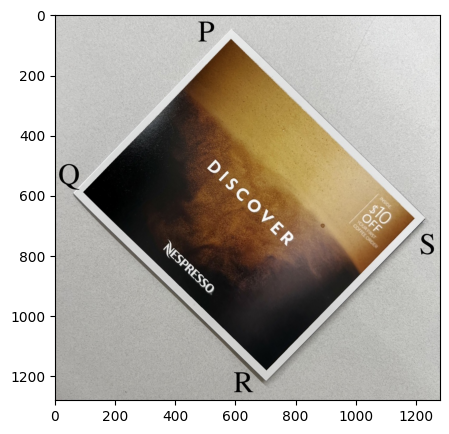

In [14]:
print('Apply H_13 to project card1 to card3: \n')
projection_homo(img_card1,img_card3,four_point_card1,four_point_card3,H_13)

- The above result looks good.
- Actually the H_13 calculated above is same to the $H^\prime_{13}$ from directly calculation

In [15]:
print('Direct Homography calculation from card1 to card3: H^\prime_{13}')
H_prime_13 = H_homo(four_point_card1,four_point_card3);

Direct Homography calculation from card1 to card3: H^\prime_{13}
Homography: 
 [[ 3.27424606e-01  4.53225157e-01 -2.71046027e+02]
 [-5.15407711e-01  1.86215743e-01  4.97997665e+02]
 [-1.29448529e-04 -3.68796547e-04  1.00000000e+00]]


In [16]:
print('H_13 is same with H^\prime_{13} as they only differ by a factor of 0.86')
H_prime_13/H_13 

H_13 is same with H^\prime_{13} as they only differ by a factor of 0.86


array([[0.86220235, 0.86220235, 0.86220235],
       [0.86220235, 0.86220235, 0.86220235],
       [0.86220235, 0.86220235, 0.86220235]])

## 1.3 Apply affine homography to the images
- function to calculate affine homography
- function to apply affine homography to the images

Calculate the affine homography.  
As we already know 3 of 9 elements of the homography, only three points are needed to calculate the 6 unknown parameter;  
The equation with three points can be given by: 
$M_{eq} H^T_v = V^T_{eq}$, where  

  $H_v$  = [h11, h12, h13, h21, h22, h_23]; 
  
  
  $M_{eq}$ =   
              [$P_x$, $P_y$, 1, 0, 0, 0  
               $S_x$, $S_y$, 1, 0, 0, 0  
               $Q_x$, $Q_y$, 1, 0, 0, 0   
               0, 0, 0,$P_x$, $P_y$, 1   
               0, 0, 0,$S_x$, $S_y$, 1   
               0, 0, 0,$Q_x$, $Q_y$, 1]  
               
               
               
 $V_{eq}$ = [$P^\prime_x$, $S^\prime_x$, $Q^\prime_x$, $P^\prime_y$, $S^\prime_y$, $Q^\prime_y$]
 
 
We can get $H^T_v = inv(M_{eq})V^T_{eq}$ 

Below is a function to calculate Affine homography matrix given ($P,S,Q$) and ($P^\prime$,$S^\prime$,$Q^\prime$)

In [17]:
# Calculate Affine Homography from base to aim, given four points in aim and base
def H_affine(base_four_point, aim_four_point):
    V_eq = np.zeros(6)
    M_eq = np.zeros((6,6))

    for i in range(3):
    
        M_eq[i,0:3] = base_four_point[i,:];
        V_eq[i] = aim_four_point[i,0]
    
        M_eq[i+3,3:6] = base_four_point[i,:];
        V_eq[i+3] = aim_four_point[i,1]
 
    M_h_para = np.matmul(inv(M_eq),V_eq)
    M_h_para = np.append(M_h_para,[0,0,1])
    M_h = M_h_para.reshape([3,3])
    print('Affine homography: \n',M_h)
    return M_h

In [18]:
# Apply affine homography to project from base to aim
def projection_affine(base, aim, base_four_point,aim_four_point):
    H_proj = H_affine(base_four_point,aim_four_point)
    
    img_new = aim.copy()

    # if point are in the regime
    four_line = calculate_line(aim_four_point)

    for i in range(0,img_new.shape[0]):
        for j in range(0,img_new.shape[1]):
            if inside_regime(four_line, np.array([i,j])):
                transform_inv(H_proj,base,img_new,np.array([i,j]))
    plt.figure(figsize=(5, 5))
    plt.imshow(img_new)

Apply affine homography to project car to card1: 

Affine homography: 
 [[ 1.59600000e+00 -1.15714286e-01  2.38591429e+02]
 [ 2.10000000e-01  1.00285714e+00  4.89614286e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


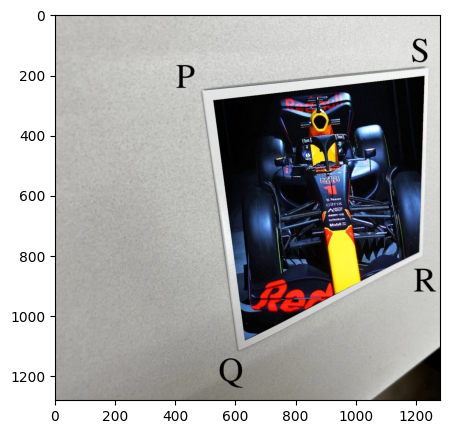

In [19]:
print('Apply affine homography to project car to card1: \n')
projection_affine(img_car,img_card1,four_point_car,four_point_card1)

- In the image of card1, parallel lines are not kept in parrallel so a good project from car to card can't be done with Affine homography  
- From the above image, the right lower part of the car image is missing during the projection.

Apply affine homography to project car to card2: 

Affine homography: 
 [[ 1.18400000e+00  1.42857143e-02  2.14051429e+02]
 [-2.02000000e-01  9.78571429e-01  3.01702857e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


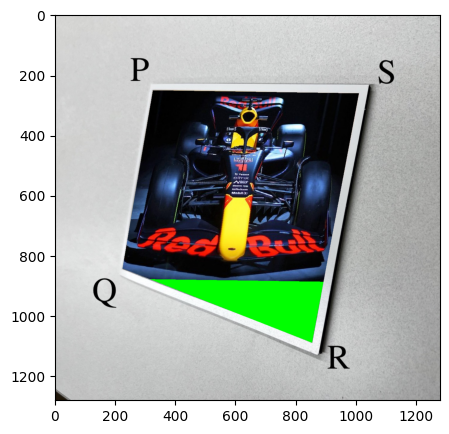

In [20]:
print('Apply affine homography to project car to card2: \n')
projection_affine(img_car,img_card2,four_point_car,four_point_card2)

- In the image of card2, parallel lines are not kept in parrallel so a good project from car to card can't be done with Affine homography  
- From the above image, the right lower card is green, indicating no corresponding points in the car image.

Apply affine homography to project car to card3: 

Affine homography: 
 [[  1.02         0.85285714  21.81428571]
 [ -0.984        0.87142857 588.37714286]
 [  0.           0.           1.        ]]


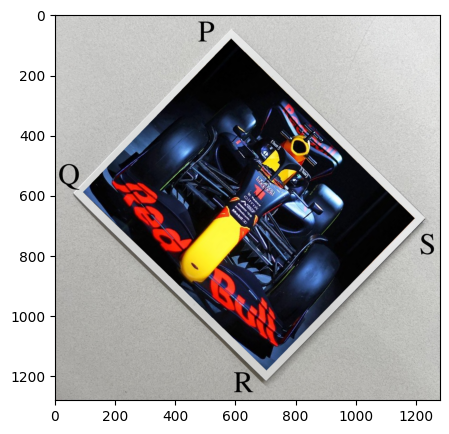

In [21]:
print('Apply affine homography to project car to card3: \n')
projection_affine(img_car,img_card3,four_point_car,four_point_card3)

- the above projection looks good, as in card3 image, parallel lines are parallel. Affine homography applies well for this projection.

# Task2: my own images
- apply the same function from task1 for new images

## Import four images and four points (P,S,Q,R)

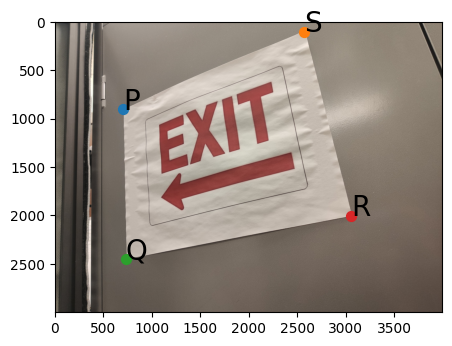

In [22]:
# Exit1
img_exit1 = mpimg.imread('exit1.jpg')

plt.figure(figsize=(5, 5))
plt.imshow(img_exit1)

# read the position info with ImageJ
P1 = [705,904,1]
S1 = [2568,102,1]
Q1 = [732,2448,1]
R1 = [3054,2004,1]

# realize the position index read from ImageJ x,y are exchanged 
P1[1],P1[0] = P1[0],P1[1]
Q1[1],Q1[0] = Q1[0],Q1[1]
R1[1],R1[0] = R1[0],R1[1]
S1[1],S1[0] = S1[0],S1[1]

four_point_exit1 = np.array([P1,S1,Q1,R1])
text = ['P','S','Q','R']

for i in range(len(four_point_exit1)):
    plt.scatter(four_point_exit1[i][1],four_point_exit1[i][0],marker='o',s=50)
    plt.text(four_point_exit1[i][1],four_point_exit1[i][0],text[i],fontsize=20)    

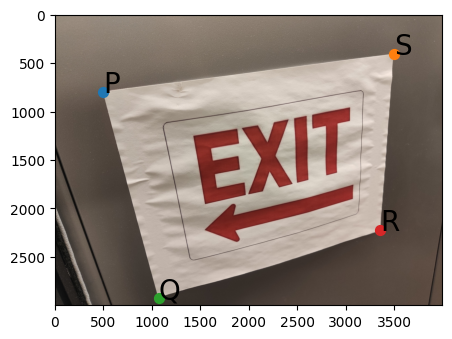

In [23]:
# Exit2
img_exit2 = mpimg.imread('exit2.jpg')

plt.figure(figsize=(5, 5))
plt.imshow(img_exit2)

# read the position info with ImageJ
P1 = [498,798,1]
S1 = [3498,408,1]
Q1 = [1074,2928,1]
R1 = [3354,2222,1]

# realize the position index read from ImageJ x,y are exchanged 
P1[1],P1[0] = P1[0],P1[1]
Q1[1],Q1[0] = Q1[0],Q1[1]
R1[1],R1[0] = R1[0],R1[1]
S1[1],S1[0] = S1[0],S1[1]

four_point_exit2 = np.array([P1,S1,Q1,R1])
text = ['P','S','Q','R']

for i in range(len(four_point_exit2)):
    plt.scatter(four_point_exit2[i][1],four_point_exit2[i][0],marker='o',s=50)
    plt.text(four_point_exit2[i][1],four_point_exit2[i][0],text[i],fontsize=20)

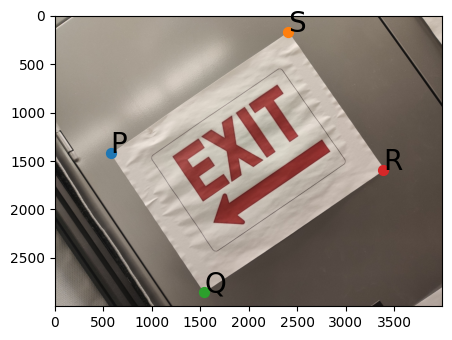

In [24]:
# Exit3
img_exit3 = mpimg.imread('exit3.jpg')

plt.figure(figsize=(5, 5))
plt.imshow(img_exit3)

# read the position info with ImageJ
P1 = [576,1422,1]
S1 = [2406,168,1]
Q1 = [1542,2856,1]
R1 = [3390,1596,1]

# realize the position index read from ImageJ x,y are exchanged 
P1[1],P1[0] = P1[0],P1[1]
Q1[1],Q1[0] = Q1[0],Q1[1]
R1[1],R1[0] = R1[0],R1[1]
S1[1],S1[0] = S1[0],S1[1]

four_point_exit3 = np.array([P1,S1,Q1,R1])
text = ['P','S','Q','R']

for i in range(len(four_point_exit3)):
    plt.scatter(four_point_exit3[i][1],four_point_exit3[i][0],marker='o',s=50)
    plt.text(four_point_exit3[i][1],four_point_exit3[i][0],text[i],fontsize=20)

Text(540, 1100, 'R')

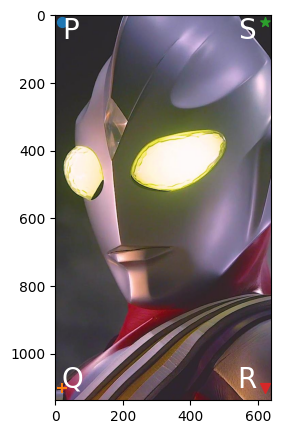

In [25]:
# Automan
img_automan= mpimg.imread('automan.jpg')

plt.figure(figsize=(5, 5))
plt.imshow(img_automan)

# read the position info with ImageJ; 640, 1138
P_automan = [20,20,1]
S_automan = [620,20,1]
Q_automan = [20,1100,1]
R_automan = [620,1100,1]

# realize the position index read from ImageJ x,y are exchanged 
P_automan[1],P_automan[0] = P_automan[0],P_automan[1]
Q_automan[1],Q_automan[0] = Q_automan[0],Q_automan[1]
R_automan[1],R_automan[0] = R_automan[0],R_automan[1]
S_automan[1],S_automan[0] = S_automan[0],S_automan[1]

four_point_automan = np.array([P_automan,S_automan,Q_automan,R_automan])

plt.scatter(P_automan[1],P_automan[0],marker='o',s=50)
plt.text(P_automan[1],P_automan[0]+50,'P', color = 'white', fontsize=20)
plt.scatter(Q_automan[1],Q_automan[0],marker='+',s=50)
plt.text(Q_automan[1],Q_automan[0],'Q',color = 'white', fontsize=20)
plt.scatter(S_automan[1],S_automan[0],marker='*',s=50)
plt.text(S_automan[1]-80,S_automan[0]+50,'S',color = 'white', fontsize=20)
plt.scatter(R_automan[1],R_automan[0],marker='v',s=50)
plt.text(R_automan[1]-80,R_automan[0],'R',color = 'white', fontsize=20)

## 2.1 Calculate homography

In [26]:
print('(1) Projection from automan to exit1: \n')
H_homo(four_point_automan,four_point_exit1);

(1) Projection from automan to exit1: 

Homography: 
 [[ 1.07654954e+00 -1.36071553e+00  9.00517631e+02]
 [-7.64970365e-02  2.12684832e+00  6.56844953e+02]
 [-1.38310875e-04 -3.68640953e-04  1.00000000e+00]]


In [27]:
print('(2) Projection from automan to exit2: \n')
H_homo(four_point_automan,four_point_exit2);

(2) Projection from automan to exit2: 

Homography: 
 [[ 2.92841805e+00 -4.50242524e-01  7.61706638e+02]
 [ 8.80908138e-01  6.88844432e+00  3.50894322e+02]
 [ 3.15368591e-04  5.16094348e-04  1.00000000e+00]]


In [28]:
print('(3) Projection from automan to exit3: \n')
H_homo(four_point_automan,four_point_exit3);

(3) Projection from automan to exit3: 

Homography: 
 [[ 1.30590118e+00 -2.09031312e+00  1.43733208e+03]
 [ 8.82588450e-01  3.03725494e+00  4.97458866e+02]
 [-7.54343023e-06 -4.97969494e-06  1.00000000e+00]]


## 2.1 Homography exit1 -> exit3

In [29]:
print('(1) Projection from eixt1 to eixt2 H_12: \n')
H_12 = H_homo(four_point_exit1,four_point_exit2);

(1) Projection from eixt1 to eixt2 H_12: 

Homography: 
 [[ 7.99544445e+00  3.24455677e+00 -6.90835186e+03]
 [ 2.33668482e+00  1.04374796e+01 -7.84389733e+03]
 [ 1.18113811e-03  1.70084584e-03  1.00000000e+00]]


In [30]:
print('(1) Projection from eixt2 to eixt3 H_23: \n')
H_23 = H_homo(four_point_exit2,four_point_exit3);

(1) Projection from eixt2 to eixt3 H_23: 

Homography: 
 [[ 3.83292061e-01 -3.34485943e-01  1.12807849e+03]
 [ 1.32250704e-01  3.92336895e-01  2.12445860e+02]
 [-8.56092672e-05 -8.11725248e-05  1.00000000e+00]]


In [31]:
print('(3) Calculate H_13 = H_23 H_12 \n')
H_13 = np.matmul(H_23, H_12)
print('H_13 = \n', H_13)

(3) Calculate H_13 = H_23 H_12 

H_13 = 
 [[ 3.61541866e+00 -3.28889747e-01  1.10383547e+03]
 [ 2.22509872e+00  4.88544093e+00 -3.77863885e+03]
 [ 3.06979366e-04  5.75845140e-04  2.22812789e+00]]


Apply H_13 to project exit1 to exit3: 



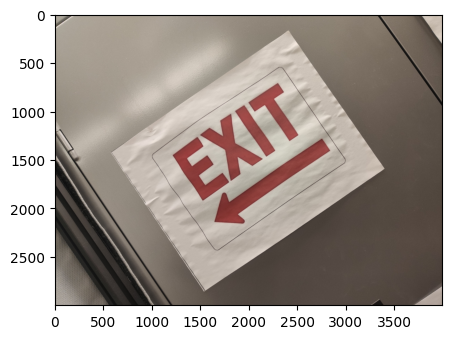

In [32]:
print('Apply H_13 to project exit1 to exit3: \n')
projection_homo(img_exit1,img_exit3,four_point_exit1,four_point_exit3,H_13)

## 2.3 Apply affine homography to the images

Apply affine homography to project automan to exit1: 

Affine homography: 
 [[ 1.42962963e+00 -1.33666667e+00  9.02140741e+02]
 [ 2.50000000e-02  3.10500000e+00  6.42400000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


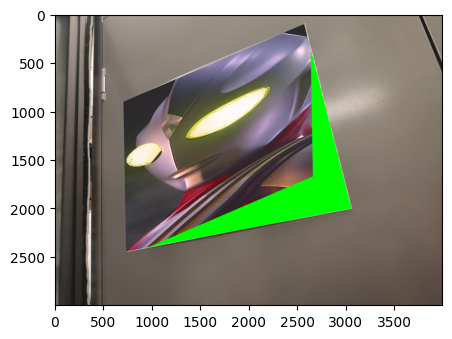

In [33]:
print('Apply affine homography to project automan to exit1: \n')
projection_affine(img_automan,img_exit1,four_point_automan,four_point_exit1)

Apply affine homography to project automan to exit2: 

Affine homography: 
 [[ 1.97222222e+00 -6.50000000e-01  7.71555556e+02]
 [ 5.33333333e-01  5.00000000e+00  3.87333333e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


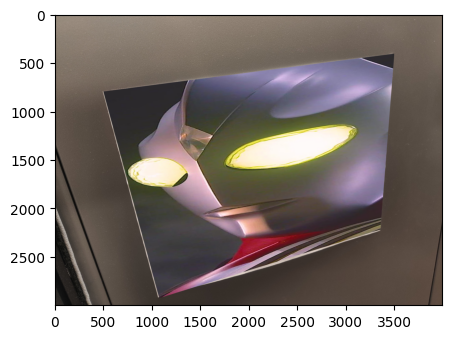

In [34]:
print('Apply affine homography to project automan to exit2: \n')
projection_affine(img_automan,img_exit2,four_point_automan,four_point_exit2)

Apply affine homography to project automan to exit3: 

Affine homography: 
 [[ 1.32777778e+00 -2.09000000e+00  1.43724444e+03]
 [ 8.94444444e-01  3.05000000e+00  4.97111111e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


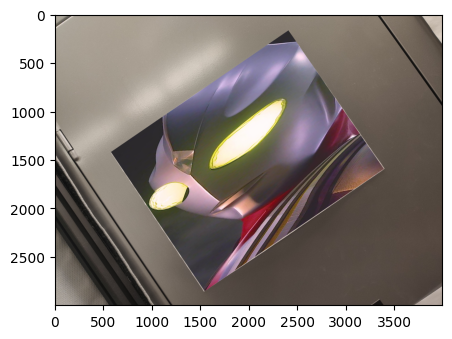

In [35]:
print('Apply affine homography to project automan to exit3: \n')
projection_affine(img_automan,img_exit3,four_point_automan,four_point_exit3)

- Same to the former result from task1, exit3 looks great as it agrees well with affine Tomography.
- exit1 and exit2 doesn't agree with affine homograhy so the image is overfit or not complete

## Part3: Adding more points for the card and car data

- If we take bisectors as extra points, We are not adding more information for the projection operation. The bisectors will be projected as the bisectors in the new image.   

$P^{\prime T}$ = H $P^T$   
$Q^{\prime T}$ = H $Q^T$  

If $U^{\prime} = (P^{\prime} + Q^{\prime})/2 $, $U = (P+Q)/2$   
We can get $U^{\prime T} = H U^T$


- So I believe the result won't change.